In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [17]:
# Cargar el archivo de resultados en un DataFrame de Pandas
df = pd.read_csv("resultados_C.txt", sep="\t")
print(len(df))
# Mostrar las primeras filas del DataFrame
df.head()

New_df = df[["L","P","Inh","Trest","Trelative","C_h","Tipo_red","D_eucli"]]
New_df.head()

749


,L,P,Inh,Trest,Trelative,C_h,Tipo_red,D_eucli
0,40,0.020455,0.968534,0.015674,7.395822,0.712016,4,677.2733
1,27,0.966403,0.283095,0.600710,6.542839,0.427531,3,1624.5071
2,27,0.970109,0.059620,2.435948,6.549183,0.874324,4,1624.5071
3,33,0.638102,0.716085,3.916280,9.392900,0.899333,4,3468.2100
4,26,0.381746,0.104039,4.163946,13.536489,0.008920,4,1624.5071


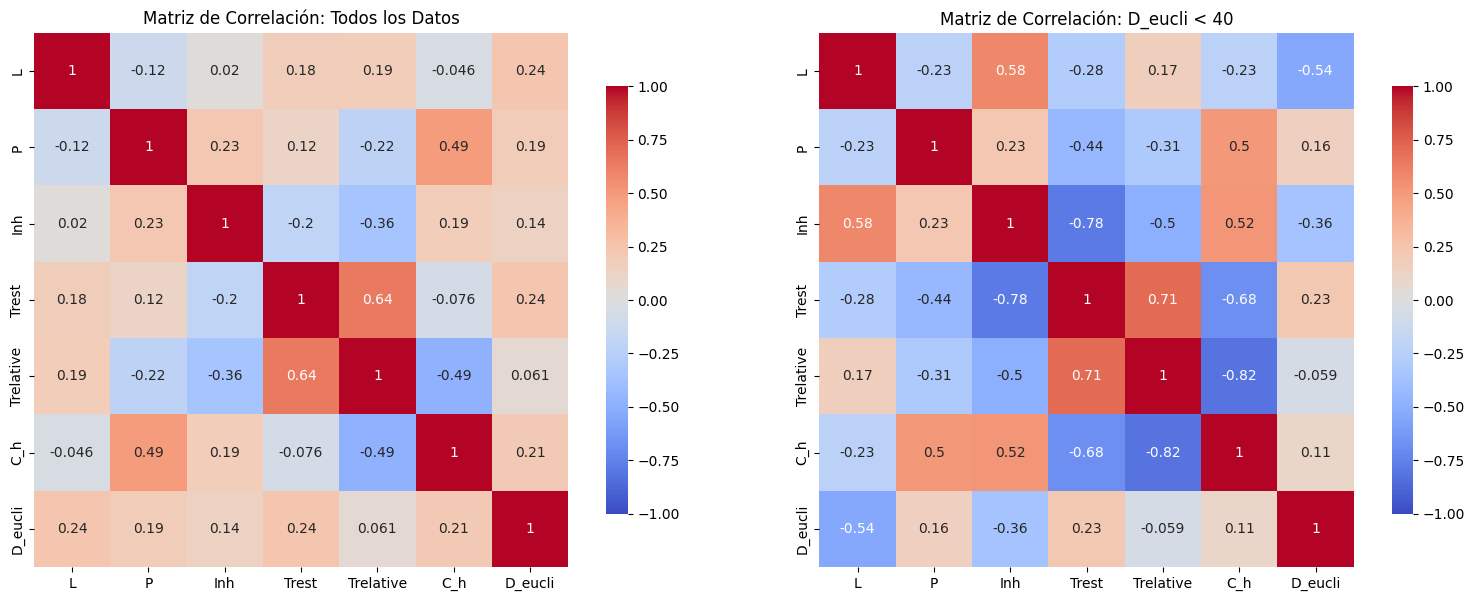

In [21]:


correlation_matrix_full = New_df[["L", "P", "Inh", "Trest", "Trelative", "C_h", "D_eucli"]].corr()

filtered_df = New_df[New_df["D_eucli"] < 40]
correlation_matrix_filtered = filtered_df[["L", "P", "Inh", "Trest", "Trelative", "C_h", "D_eucli"]].corr()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(
    correlation_matrix_full,
    annot=True,
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    square=True,
    cbar_kws={"shrink": .8},
    ax=axes[0]
)
axes[0].set_title("Matriz de Correlación: Todos los Datos")
sns.heatmap(
    correlation_matrix_filtered,
    annot=True,
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    square=True,
    cbar_kws={"shrink": .8},
    ax=axes[1]
)
axes[1].set_title("Matriz de Correlación: D_eucli < 40")

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [22]:
regular=New_df[(New_df["Tipo_red"]==0)&(New_df["D_eucli"]<30)]
Small_w=New_df[((New_df["Tipo_red"]==1)|(New_df["Tipo_red"]==2))&(New_df["D_eucli"]<30)]
Random=New_df[((New_df["Tipo_red"]==3)|(New_df["Tipo_red"]==4))&(New_df["D_eucli"]<30)]


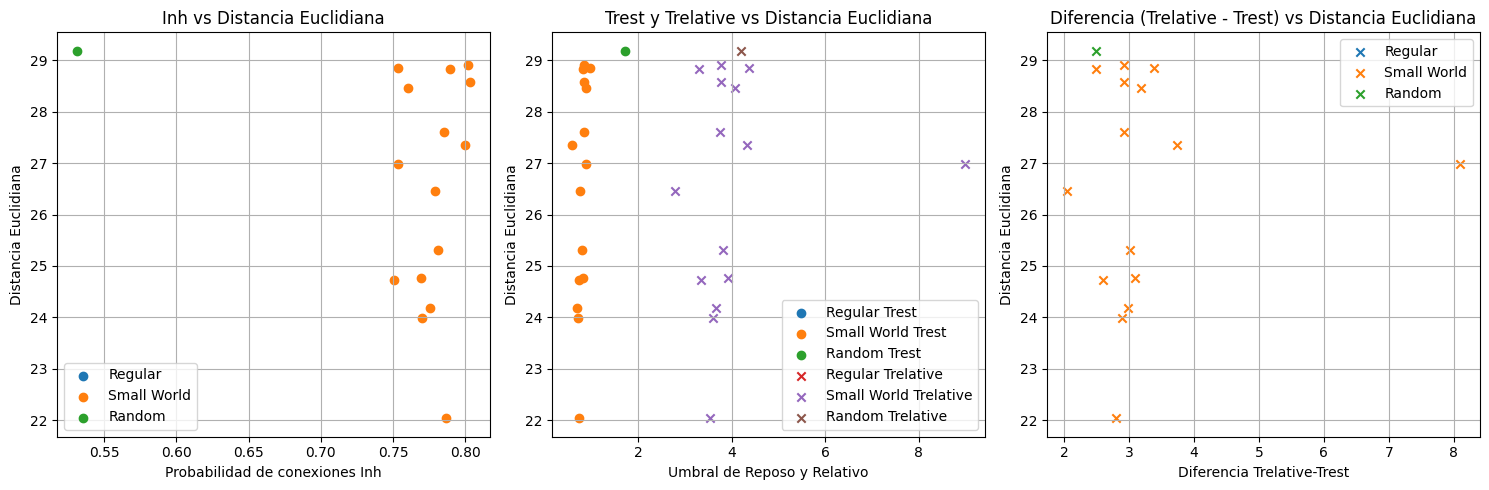

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Primer gráfico: Inh vs D_eucli
axes[0].scatter(regular["Inh"], regular["D_eucli"], label="Regular")
axes[0].scatter(Small_w["Inh"], Small_w["D_eucli"], label="Small World")
axes[0].scatter(Random["Inh"], Random["D_eucli"], label="Random")
axes[0].grid()
axes[0].set_xlabel("Probabilidad de conexiones Inh")
axes[0].set_ylabel("Distancia Euclidiana")
axes[0].legend()
axes[0].set_title("Inh vs Distancia Euclidiana")

# Segundo gráfico: Trest y Trelative vs D_eucli
axes[1].scatter(regular["Trest"], regular["D_eucli"], label="Regular Trest")
axes[1].scatter(Small_w["Trest"], Small_w["D_eucli"], label="Small World Trest")
axes[1].scatter(Random["Trest"], Random["D_eucli"], label="Random Trest")
axes[1].scatter(regular["Trelative"], regular["D_eucli"], label="Regular Trelative", marker="x")
axes[1].scatter(Small_w["Trelative"], Small_w["D_eucli"], label="Small World Trelative", marker="x")
axes[1].scatter(Random["Trelative"], Random["D_eucli"], label="Random Trelative", marker="x")
axes[1].grid()
axes[1].set_xlabel("Umbral de Reposo y Relativo")
axes[1].set_ylabel("Distancia Euclidiana")
axes[1].legend()
axes[1].set_title("Trest y Trelative vs Distancia Euclidiana")

# Tercer gráfico: Diferencia Trelative-Trest vs D_eucli
axes[2].scatter(regular["Trelative"] - regular["Trest"], regular["D_eucli"], label="Regular", marker="x")
axes[2].scatter(Small_w["Trelative"] - Small_w["Trest"], Small_w["D_eucli"], label="Small World", marker="x")
axes[2].scatter(Random["Trelative"] - Random["Trest"], Random["D_eucli"], label="Random", marker="x")
axes[2].grid()
axes[2].set_xlabel("Diferencia Trelative-Trest")
axes[2].set_ylabel("Distancia Euclidiana")
axes[2].legend()
axes[2].set_title("Diferencia (Trelative - Trest) vs Distancia Euclidiana")

# Ajustar diseño para evitar solapamiento
plt.tight_layout()

# Mostrar la gráfica
plt.show()

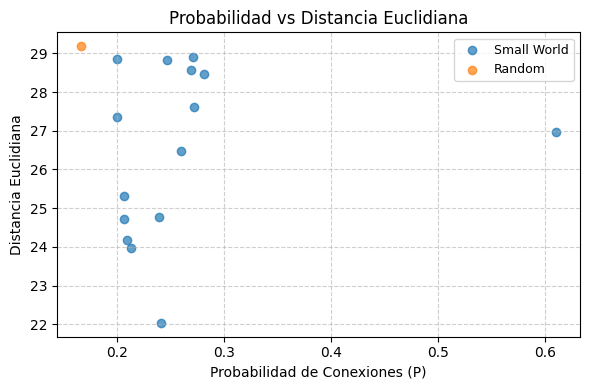

In [24]:
plt.figure(figsize=(6, 4))

# Graficar los datos
plt.scatter(Small_w["P"], Small_w["D_eucli"], label="Small World", alpha=0.7)
plt.scatter(Random["P"], Random["D_eucli"], label="Random", alpha=0.7)

# Configuración de la cuadrícula y el estilo
plt.grid(True, linestyle='--', alpha=0.6)

# Etiquetas y título
plt.xlabel("Probabilidad de Conexiones (P)", fontsize=10)
plt.ylabel("Distancia Euclidiana", fontsize=10)
plt.title("Probabilidad vs Distancia Euclidiana", fontsize=12)

# Leyenda
plt.legend(loc="best", fontsize=9)

# Mostrar la gráfica
plt.tight_layout()
plt.show()


/tmp/ipykernel_7429/1650744662.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(regular["D_eucli"], patch_artist=True, boxprops=dict(facecolor='lightcoral', alpha=0.6), labels=['Regular'])  # Asignar etiqueta para P


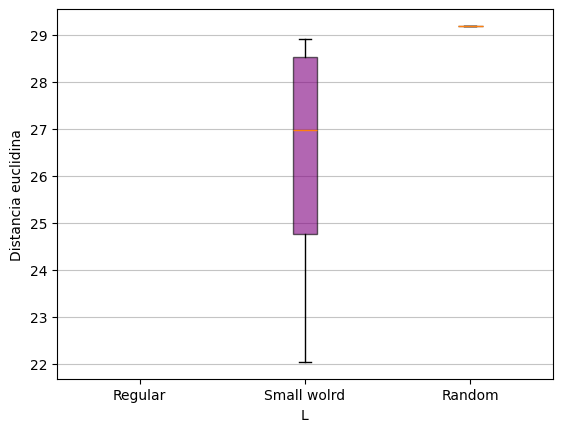

In [25]:
plt.boxplot(regular["D_eucli"], patch_artist=True, boxprops=dict(facecolor='lightcoral', alpha=0.6), labels=['Regular'])  # Asignar etiqueta para P
plt.boxplot(Small_w["D_eucli"], patch_artist=True, boxprops=dict(facecolor='purple', alpha=0.6), positions=[2])  # Asignar etiqueta para Inh, en posición 2
plt.boxplot(Random["D_eucli"], patch_artist=True, boxprops=dict(facecolor='purple', alpha=0.6), positions=[3])  # Asignar etiqueta para Inh, en posición 2
plt.ylabel('Distancia euclidina')
plt.xlabel('L')
plt.xticks([1, 2,3], ['Regular', 'Small wolrd', 'Random'])  # Asignar etiquetas a los ticks del eje x
plt.grid(axis='y', alpha=0.75)

In [6]:
plt.boxplot(L10["D_eucli"], patch_artist=True, boxprops=dict(facecolor='lightcoral', alpha=0.6), labels=['10-20'])  # Asignar etiqueta para P
plt.boxplot(L20["D_eucli"], patch_artist=True, boxprops=dict(facecolor='purple', alpha=0.6), positions=[2])  # Asignar etiqueta para Inh, en posición 2
plt.boxplot(L30["D_eucli"], patch_artist=True, boxprops=dict(facecolor='purple', alpha=0.6), positions=[3])  # Asignar etiqueta para Inh, en posición 2
plt.boxplot(L40["D_eucli"], patch_artist=True, boxprops=dict(facecolor='purple', alpha=0.6), positions=[4])  # Asignar etiqueta para Inh, en posición 2
plt.boxplot(L50["D_eucli"], patch_artist=True, boxprops=dict(facecolor='purple', alpha=0.6), positions=[5])  # Asignar etiqueta para Inh, en posición 2
plt.boxplot(L60["D_eucli"], patch_artist=True, boxprops=dict(facecolor='purple', alpha=0.6), positions=[6])  # Asignar etiqueta para Inh, en posición 2
plt.boxplot(L70["D_eucli"], patch_artist=True, boxprops=dict(facecolor='purple', alpha=0.6), positions=[7])  # Asignar etiqueta para Inh, en posición 2
plt.boxplot(L90["D_eucli"], patch_artist=True, boxprops=dict(facecolor='purple', alpha=0.6), positions=[8])  # Asignar etiqueta para Inh, en posición 2


plt.ylabel('D_eucli')
plt.xlabel('L')
plt.xticks([1, 2,3,4,5,6,7,8], ['10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '90-100'])  # Asignar etiquetas a los ticks del eje x
plt.grid(axis='y', alpha=0.75)


NameError: name 'L10' is not defined

/tmp/ipykernel_21188/3549742420.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(L10["Trest"], patch_artist=True, boxprops=dict(facecolor='lightcoral', alpha=0.6), labels=['10-20'])  # Asignar etiqueta para P


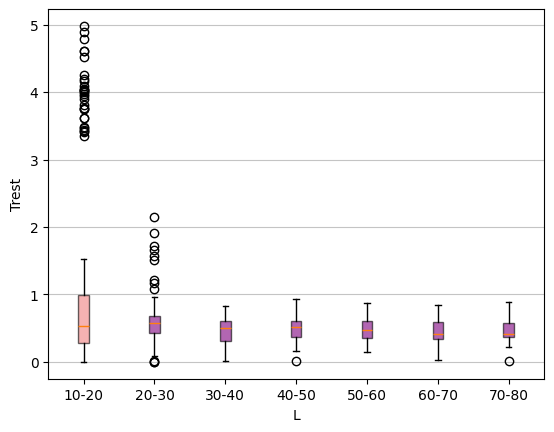

In [72]:
plt.boxplot(L10["Trest"], patch_artist=True, boxprops=dict(facecolor='lightcoral', alpha=0.6), labels=['10-20'])  # Asignar etiqueta para P
plt.boxplot(L20["Trest"], patch_artist=True, boxprops=dict(facecolor='purple', alpha=0.6), positions=[2])  # Asignar etiqueta para Inh, en posición 2
plt.boxplot(L30["Trest"], patch_artist=True, boxprops=dict(facecolor='purple', alpha=0.6), positions=[3])  # Asignar etiqueta para Inh, en posición 2
plt.boxplot(L40["Trest"], patch_artist=True, boxprops=dict(facecolor='purple', alpha=0.6), positions=[4])  # Asignar etiqueta para Inh, en posición 2
plt.boxplot(L50["Trest"], patch_artist=True, boxprops=dict(facecolor='purple', alpha=0.6), positions=[5])  # Asignar etiqueta para Inh, en posición 2
plt.boxplot(L60["Trest"], patch_artist=True, boxprops=dict(facecolor='purple', alpha=0.6), positions=[6])  # Asignar etiqueta para Inh, en posición 2
plt.boxplot(L70["Trest"], patch_artist=True, boxprops=dict(facecolor='purple', alpha=0.6), positions=[7])  # Asignar etiqueta para Inh, en posición 2

plt.ylabel('Trest')
plt.xlabel('L')
plt.xticks([1, 2,3,4,5,6,7], ['10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])  # Asignar etiquetas a los ticks del eje x
plt.grid(axis='y', alpha=0.75)

/tmp/ipykernel_21188/3473967342.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(T0["D_eucli"], patch_artist=True, boxprops=dict(facecolor='lightcoral', alpha=0.6), labels=['0'])  # Asignar etiqueta para P
/tmp/ipykernel_21188/3473967342.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(T0["D_eucli"], patch_artist=True, boxprops=dict(facecolor='lightcoral', alpha=0.6), labels=['0'])  # Asignar etiqueta para P


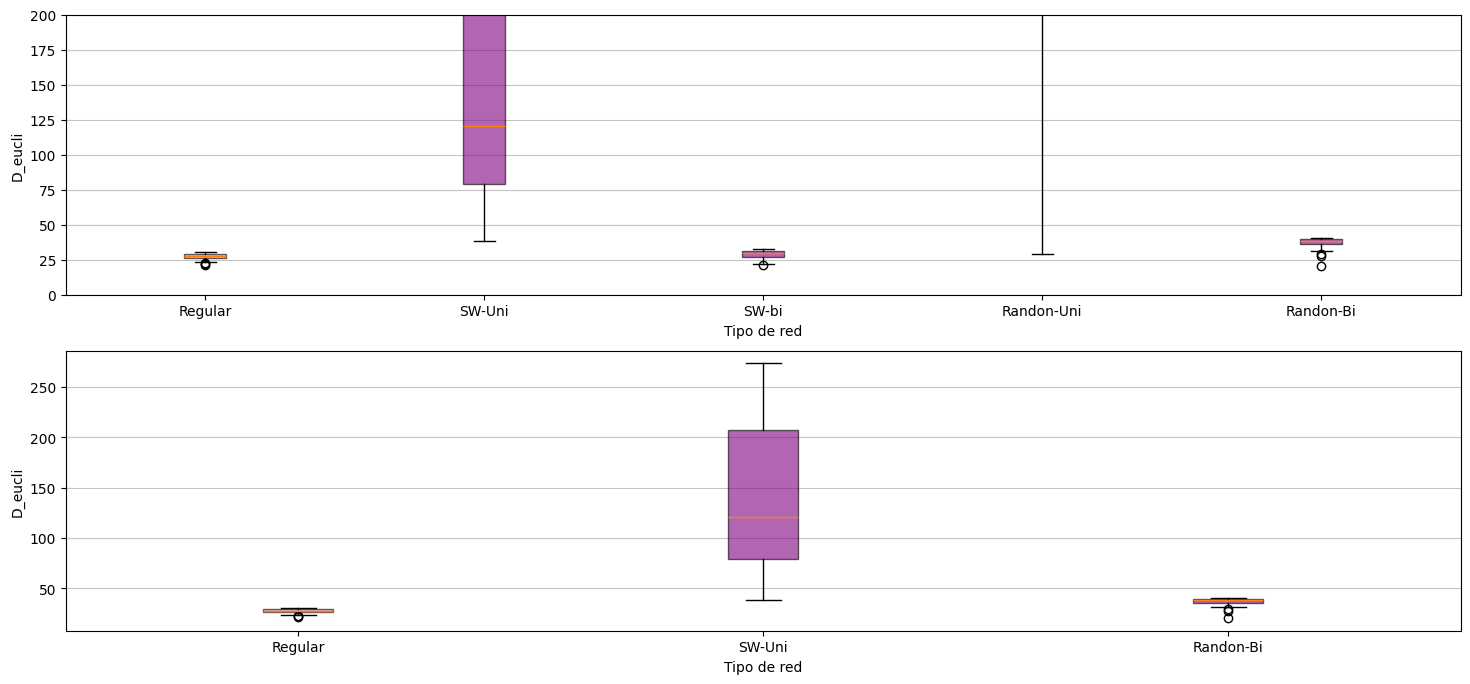

In [73]:
plt.figure(figsize=(18, 8))

plt.subplot(2, 1, 1)
plt.boxplot(T0["D_eucli"], patch_artist=True, boxprops=dict(facecolor='lightcoral', alpha=0.6), labels=['0'])  # Asignar etiqueta para P
plt.boxplot(T1["D_eucli"], patch_artist=True, boxprops=dict(facecolor='purple', alpha=0.6), positions=[2])  # Asignar etiqueta para Inh, en posición 2
plt.boxplot(T2["D_eucli"], patch_artist=True, boxprops=dict(facecolor='purple', alpha=0.6), positions=[3])  # Asignar etiqueta para Inh, en posición 2
plt.boxplot(T3["D_eucli"], patch_artist=True, boxprops=dict(facecolor='purple', alpha=0.6), positions=[4])  # Asignar etiqueta para Inh, en posición 2
plt.boxplot(T4["D_eucli"], patch_artist=True, boxprops=dict(facecolor='purple', alpha=0.6), positions=[5])  # Asignar etiqueta para Inh, en posición 2
plt.ylabel('D_eucli')
plt.xlabel('Tipo de red')
plt.ylim(0,200)
plt.xticks([1, 2,3,4,5], ['Regular', 'SW-Uni', 'SW-bi', 'Randon-Uni', 'Randon-Bi'])  # Asignar etiquetas a los ticks del eje x
plt.grid(axis='y', alpha=0.75)

plt.subplot(2, 1, 2)
plt.boxplot(T0["D_eucli"], patch_artist=True, boxprops=dict(facecolor='lightcoral', alpha=0.6), labels=['0'])  # Asignar etiqueta para P
plt.boxplot(T1["D_eucli"], patch_artist=True, boxprops=dict(facecolor='purple', alpha=0.6), positions=[2])  # Asignar etiqueta para Inh, en posición 2
plt.boxplot(T4["D_eucli"], patch_artist=True, boxprops=dict(facecolor='purple', alpha=0.6), positions=[3])  # Asignar etiqueta para Inh, en posición 2
plt.ylabel('D_eucli')
plt.xlabel('Tipo de red')
plt.xticks([1,2,3], ['Regular', 'SW-Uni' ,'Randon-Bi'])  # Asignar etiquetas a los ticks del eje x
plt.grid(axis='y', alpha=0.75)

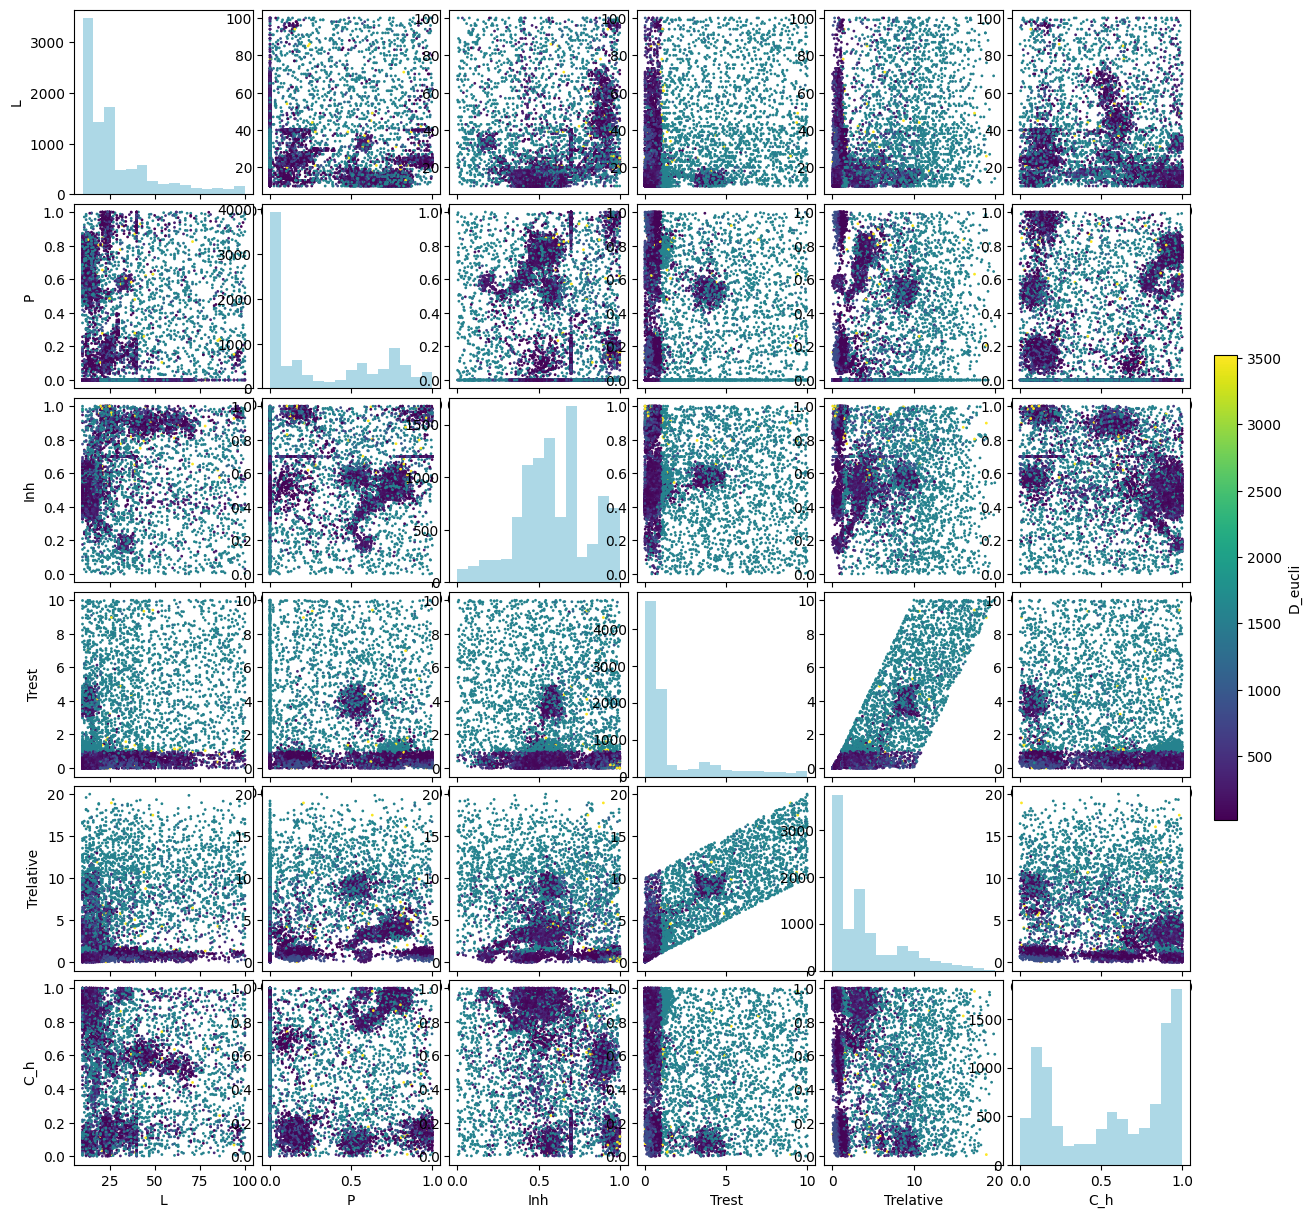

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables de ejemplo (asegúrate de que T1 tenga estas columnas)
variables = ["L", "P", "Inh", "Trest", "Trelative", "C_h"]  # Columnas relevantes
D_eucli_values = New_df["D_eucli"]  # Suponiendo que 'D_eucli' es una columna del DataFrame T1

# Crear subgráficos
fig, axes = plt.subplots(len(variables), len(variables), figsize=(15, 15))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

for i, var1 in enumerate(variables):
    for j, var2 in enumerate(variables):
        if i == j:
            # Diagonal: histogramas para cada variable
            axes[i, j].hist(New_df[var1], bins=15, color='lightblue')
            axes[i, j].set_xlabel(var1)
        else:
            # Fuera de la diagonal: scatter plots con colores mapeados a D_eucli
            scatter = axes[i, j].scatter(
                New_df[var2], New_df[var1],
                s=1, c=D_eucli_values, cmap='viridis'
            )
        # Etiquetas en los márgenes
        if j == 0:
            axes[i, j].set_ylabel(var1)
        if i == len(variables) - 1:
            axes[i, j].set_xlabel(var2)

# Barra de color para D_eucli
cbar = fig.colorbar(scatter, ax=axes, orientation='vertical', fraction=0.02, pad=0.02)
cbar.set_label('D_eucli')

plt.show()


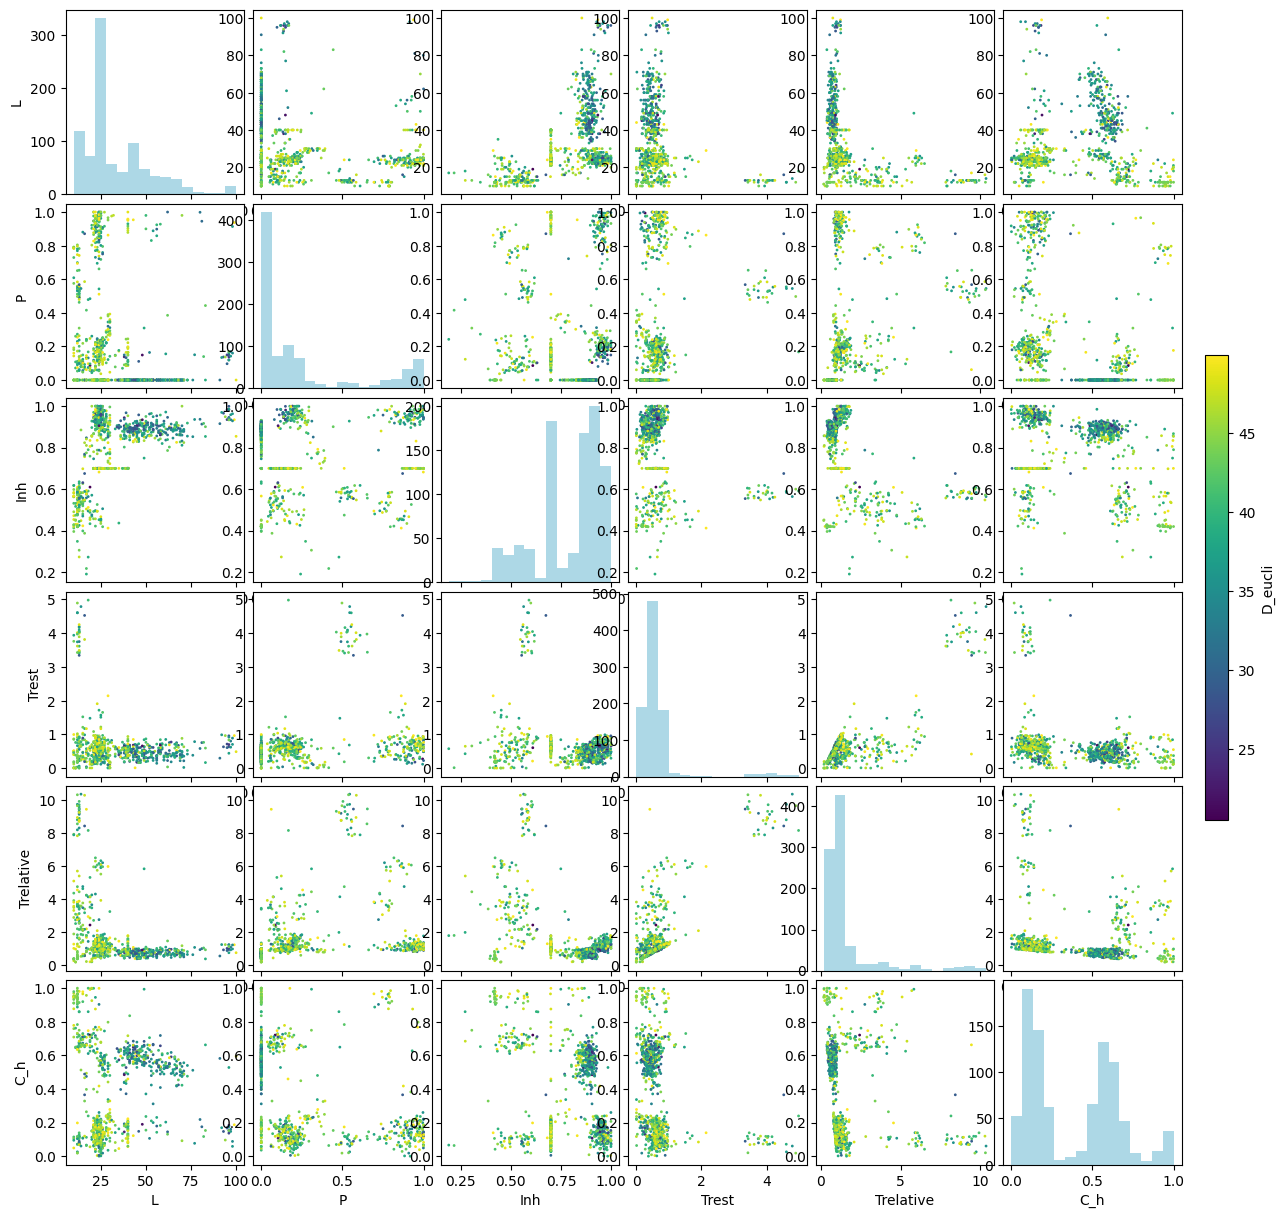

In [75]:
# Variables de ejemplo (asegúrate de que T1 tenga estas columnas)
variables = ["L", "P", "Inh", "Trest", "Trelative", "C_h"]  # Columnas relevantes
D_eucli_values = sorted_df["D_eucli"]  # Suponiendo que 'D_eucli' es una columna del DataFrame T1

# Crear subgráficos
fig, axes = plt.subplots(len(variables), len(variables), figsize=(15, 15))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

for i, var1 in enumerate(variables):
    for j, var2 in enumerate(variables):
        if i == j:
            # Diagonal: histogramas para cada variable
            axes[i, j].hist(sorted_df[var1], bins=15, color='lightblue')
            axes[i, j].set_xlabel(var1)
        else:
            # Fuera de la diagonal: scatter plots con colores mapeados a D_eucli
            scatter = axes[i, j].scatter(
                sorted_df[var2], sorted_df[var1],
                s=1, c=D_eucli_values, cmap='viridis'
            )
        # Etiquetas en los márgenes
        if j == 0:
            axes[i, j].set_ylabel(var1)
        if i == len(variables) - 1:
            axes[i, j].set_xlabel(var2)

# Barra de color para D_eucli
cbar = fig.colorbar(scatter, ax=axes, orientation='vertical', fraction=0.02, pad=0.02)
cbar.set_label('D_eucli')

plt.show()
